In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint

# File to Load (Remember to Change These)
file_to_load = "dow.csv"

# Read Purchasing File and store into Pandas data frame
dow_data = pd.read_csv(file_to_load)

#Create a dataframe to view the initial data
dow_data_df = pd.DataFrame(dow_data)

#URL setup
url = 'https://api.coindesk.com/v1/bpi/historical/close.json?'
default = 'start=2020-01-01&end=2020-12-31'
start_date = '2020-01-01'
end_date = '2020-12-31'

In [16]:
query_url = f'{url}start={start_date}&end={end_date}'

pprint(requests.get(query_url).json())

{'bpi': {'2020-01-01': 7188.4633,
         '2020-01-02': 6961.5683,
         '2020-01-03': 7346.58,
         '2020-01-04': 7355.855,
         '2020-01-05': 7356.3117,
         '2020-01-06': 7761.825,
         '2020-01-07': 8157.7617,
         '2020-01-08': 8042.8733,
         '2020-01-09': 7816.9233,
         '2020-01-10': 8189.265,
         '2020-01-11': 8016.4267,
         '2020-01-12': 8178.8833,
         '2020-01-13': 8105.4783,
         '2020-01-14': 8807.4267,
         '2020-01-15': 8808.4867,
         '2020-01-16': 8716.9133,
         '2020-01-17': 8890.25,
         '2020-01-18': 8901.17,
         '2020-01-19': 8698.5717,
         '2020-01-20': 8631.2883,
         '2020-01-21': 8727.6033,
         '2020-01-22': 8661.01,
         '2020-01-23': 8392.145,
         '2020-01-24': 8436.49,
         '2020-01-25': 8337.1017,
         '2020-01-26': 8602.7417,
         '2020-01-27': 8901.5067,
         '2020-01-28': 9393.2733,
         '2020-01-29': 9290.46,
         '2020-01-30': 9508.72

In [17]:
response = requests.get(query_url).json()
my_dict = response['bpi']
test_df = pd.DataFrame(list(my_dict.items()),columns = ['close date','close price']) 
test_df

,close date,close price
0,2020-01-01,7188.4633
1,2020-01-02,6961.5683
2,2020-01-03,7346.5800
3,2020-01-04,7355.8550
4,2020-01-05,7356.3117
...,...,...
361,2020-12-27,26248.2767
362,2020-12-28,27041.8667
363,2020-12-29,27353.9783
364,2020-12-30,28886.0400


In [18]:
date_ranged = dow_data_df.loc[(dow_data_df['Date'] > start_date) & (dow_data_df['Date'] <= end_date)]
date_ranged

,Date,Open,High,Low,Close,Adj Close,Volume
1,2020-01-02,28638.970703,28872.800781,28627.769531,28868.800781,28868.800781,251820000
2,2020-01-03,28553.330078,28716.310547,28500.359375,28634.880859,28634.880859,239590000
3,2020-01-06,28465.500000,28708.019531,28418.630859,28703.380859,28703.380859,252760000
4,2020-01-07,28639.179688,28685.500000,28565.279297,28583.679688,28583.679688,258900000
5,2020-01-08,28556.140625,28866.179688,28522.509766,28745.089844,28745.089844,291750000
...,...,...,...,...,...,...,...
249,2020-12-24,30155.919922,30209.669922,30099.300781,30199.869141,30199.869141,145570000
250,2020-12-28,30283.230469,30525.560547,30283.230469,30403.970703,30403.970703,302490000
251,2020-12-29,30492.070313,30588.789063,30274.240234,30335.669922,30335.669922,357610000
252,2020-12-30,30415.089844,30525.349609,30393.039063,30409.560547,30409.560547,291890000


In [28]:
dow_df = date_ranged.rename(columns={'Date':'close date', 'Close':'close price'})
merged = pd.merge(test_df, dow_df, on='close date', how='left', suffixes=(' bitcoin',' dow'))
merged

,close date,close price bitcoin,Open,High,Low,close price dow,Adj Close,Volume
0,2020-01-01,7188.4633,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,6961.5683,28638.970703,28872.800781,28627.769531,28868.800781,28868.800781,251820000.0
2,2020-01-03,7346.5800,28553.330078,28716.310547,28500.359375,28634.880859,28634.880859,239590000.0
3,2020-01-04,7355.8550,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-05,7356.3117,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
361,2020-12-27,26248.2767,NaN,NaN,NaN,NaN,NaN,NaN
362,2020-12-28,27041.8667,30283.230469,30525.560547,30283.230469,30403.970703,30403.970703,302490000.0
363,2020-12-29,27353.9783,30492.070313,30588.789063,30274.240234,30335.669922,30335.669922,357610000.0
364,2020-12-30,28886.0400,30415.089844,30525.349609,30393.039063,30409.560547,30409.560547,291890000.0


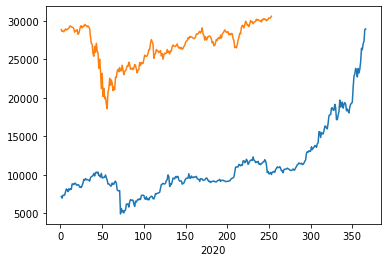

In [13]:
x_axis = range(1,test_df['close price'].count()+1)
y_axis = test_df['close price']
plt.xlabel('2020')
plt.plot(x_axis, y_axis)
x_dow = range(1,date_ranged['Date'].count()+1)
y_dow = date_ranged['Close']
plt.plot(x_dow, y_dow)

## ?? how to fit the two plots on the same scale. Stock market is closed on the weekends
## so the bigger the range, the more the plots vary. Maybe find a way to merge them to one 
## df, linking the dates...

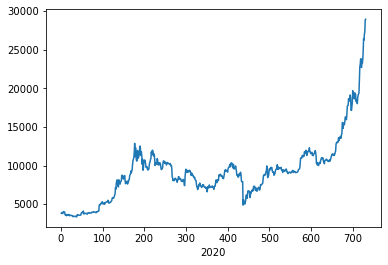

In [6]:
x_axis = range(1,test_df['close price'].count()+1)
y_axis = test_df['close price']
plt.xlabel('2020')
plt.plot(x_axis, y_axis)

#cleaning means preparing data in this case (since we're not dealing with NaNs)

In [ ]:
test_df.describe()

In [ ]:
fig1, ax1 = plt.subplots()
ax1.set_title('Drug Regimens: Final Tumor Volumes of the Top 4 Drug Regimens')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(test_df['close price'])
plt.xlabel('January 1st - January 31st')
plt.show()

#make data folder outside jupyter notebook

Meredith: covid border shut down: february 28-march 26, 2020
Darren: george floyd/social protests: may 25-june 25, 2020
Ryan: election: nov 2-nov 9